In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.path as mpath
import numpy as np
import json
import subprocess
plt.style.use('_mpl-gallery')

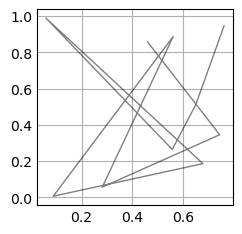

In [2]:
def gen_points(count: int):
    return np.random.random((count, 2))

def plot_points(points):
    x=points[:,0]
    y=points[:,1]
    
    # fig, ax = plt.subplots()
    # ax.plot
    
    return plt.plot(x, y, linewidth=1.0, color='black', alpha=0.5)

points = gen_points(10)
plot_points(points)

In [4]:
def get_ctrls(points):
    """get control points"""
    s = json.dumps(list(map(lambda o: {'x': o[0], 'y': o[1]}, points))).encode()
    p = subprocess.run('./process', input=s, capture_output=True)
    return np.array(json.loads(p.stdout))

ctls = get_ctrls(points)
ctls.shape

(2, 9, 2)

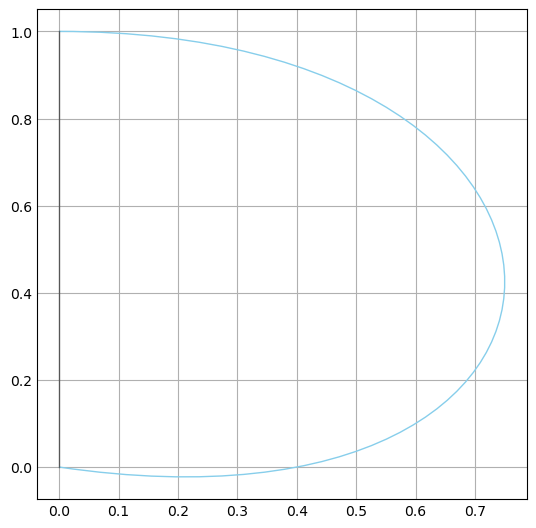

In [5]:
def plot_both(points, ctls):
    path_points = []
    for i in range(len(points)-1):
        path_points.extend([points[i],ctls[0][i],ctls[1][i], points[i+1]])
    #path_points.append(points[-1])
    path_points


    Path = mpath.Path
    
    fig, ax = plt.subplots()
    fig.set(size_inches=(5, 5))
    
    pp1 = mpatches.PathPatch(
        Path(path_points,
             [Path.MOVETO, Path.CURVE4, Path.CURVE4, Path.CURVE4] * (len(points)-1)),
        fc="none", color="skyblue")
    
    plot_points(points)
    ax.add_patch(pp1)
    
    
    #plt.show()

# sanity
points = np.array([[0,0],[0,1]])
ctrls = np.array([[[1,-0.2]],[[1,1]]])
plot_both(points, ctrls)

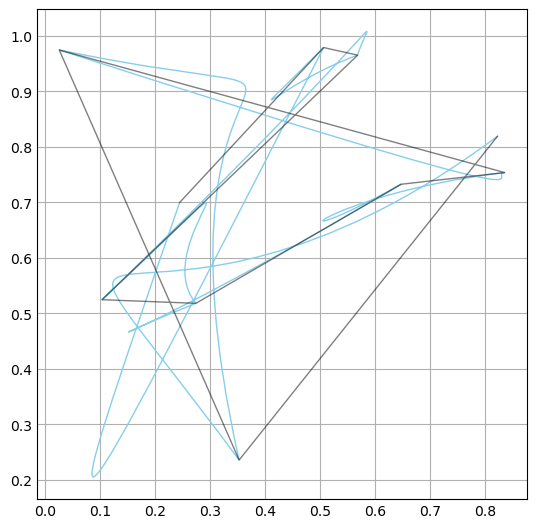

In [208]:
points = gen_points(10)
ctrls = get_ctrls(points)
plot_both(points, ctrls)